# Event Flagging

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import copy

In [2]:
import sys  
sys.path.insert(0, '/Volumes/Transcend/DataScience/data_bootcamp/data/cap_data')

In [3]:
import Metrica_IO_CF as mio
import Metrica_Viz_CF as mviz
import Metrica_Velocities_CF as mvel
import matplotlib.animation as manimation
import Metrica_PitchControl_CF as mpc

In [4]:
DATADIR = "/Volumes/Transcend/DataScience/data_bootcamp/data/cap_data"

In [5]:
game_id='/game_1'

In [6]:
events=pd.read_csv(DATADIR+game_id+'/events_cleaned.csv')

In [7]:
events=events.set_index('index')

In [8]:
tracking_home=pd.read_csv(DATADIR+game_id+'/tracking_home.csv')
tracking_away=pd.read_csv(DATADIR+game_id+'/tracking_away.csv')

In [9]:
tracking_home=tracking_home.set_index('frameIdx')
tracking_away=tracking_away.set_index('frameIdx')

In [50]:
events.columns

Index(['Team', 'Type', 'From', 'To', 'Start X', 'Start Y', 'End X', 'End Y',
       'Start Frame', 'Start Time [s]', 'Period', 'PASS_DIFFICULTY',
       'CROSSES_UNSUCCESSFUL', 'FOULS_WON', 'FOULS_CONCEDED', 'IN_BOX',
       'TACKLES_WON', 'TACKLES_LOST', 'CLEARANCE_TOTAL',
       'CLEARANCE_HEADED_WON', 'SHOTS_ON_TARGET', 'SHOTS_OFF_TARGET',
       'TAKE_ON_SUCCESSFUL', 'TAKE_ON_UNSUCCESSFUL', 'DISPOSSESSED',
       'POSSESSION_LOST', 'SHOT_QUALITY', 'SEQUENCEIDX', 'POSSESSION_EVENTS',
       'POSSESSION_START_CLOCK', 'POSSESSION_END_CLOCK',
       'POSSESSION_START_FRAMEIDX', 'POSSESSION_END_FRAMEIDX', 'FIELD_LENGTH',
       'FIELD_WIDTH', 'Event_Number', 'X_ADJ', 'Y_ADJ', 'GOAL_Y_COORDINATE',
       'GOAL_Z_COORDINATE', 'ZONE_INDEX', 'END_ZONE_INDEX', 'X_ZONE',
       'XEND_ZONE', 'Y_ZONE', 'YEND_ZONE', 'Subtype', 'frameIdx', 'ball_x',
       'ball_y', 'ball_z', 'dist'],
      dtype='object')

In [48]:
#Add ball_speed to events if it is not already there
if 'ball_speed' not in events.columns:
    events=events.merge(tracking_home.reset_index()[['frameIdx','ball_speed']],how='left', on='frameIdx')


hi there


# Ball position from tracking minus ball position from events

In [10]:
events.columns

Index(['Team', 'Type', 'From', 'To', 'Start X', 'Start Y', 'End X', 'End Y',
       'Start Frame', 'Start Time [s]', 'Period', 'PASS_DIFFICULTY',
       'CROSSES_UNSUCCESSFUL', 'FOULS_WON', 'FOULS_CONCEDED', 'IN_BOX',
       'TACKLES_WON', 'TACKLES_LOST', 'CLEARANCE_TOTAL',
       'CLEARANCE_HEADED_WON', 'SHOTS_ON_TARGET', 'SHOTS_OFF_TARGET',
       'TAKE_ON_SUCCESSFUL', 'TAKE_ON_UNSUCCESSFUL', 'DISPOSSESSED',
       'POSSESSION_LOST', 'SHOT_QUALITY', 'SEQUENCEIDX', 'POSSESSION_EVENTS',
       'POSSESSION_START_CLOCK', 'POSSESSION_END_CLOCK',
       'POSSESSION_START_FRAMEIDX', 'POSSESSION_END_FRAMEIDX', 'FIELD_LENGTH',
       'FIELD_WIDTH', 'Event_Number', 'X_ADJ', 'Y_ADJ', 'GOAL_Y_COORDINATE',
       'GOAL_Z_COORDINATE', 'ZONE_INDEX', 'END_ZONE_INDEX', 'X_ZONE',
       'XEND_ZONE', 'Y_ZONE', 'YEND_ZONE', 'Subtype', 'frameIdx', 'ball_x',
       'ball_y', 'ball_z'],
      dtype='object')

In [11]:
dist=np.sqrt((events['Start X']-events['ball_x'])**2 +(events['Start Y']-events['ball_y'])**2)

In [12]:
events['dist']=dist

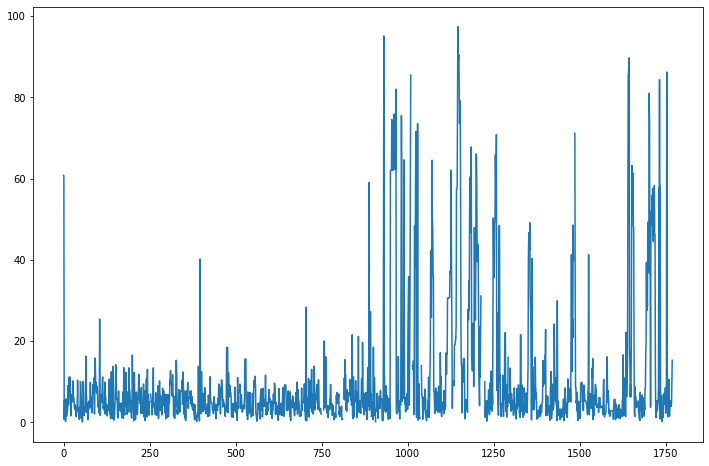

In [13]:
plt.figure(figsize=(12,8))
plt.plot(events['dist'])

In [14]:
len(events[events['dist']>12])

290

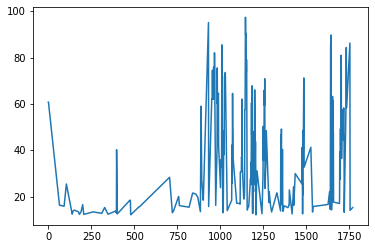

In [15]:
plt.plot(events['dist'][events['dist']>12])

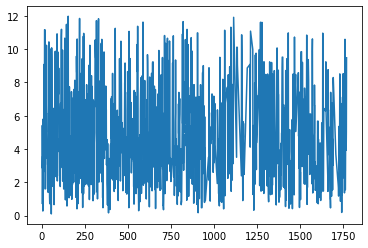

In [19]:
plt.plot(events['dist'][events['dist']<12])

## Shouldn't it be close to 0??

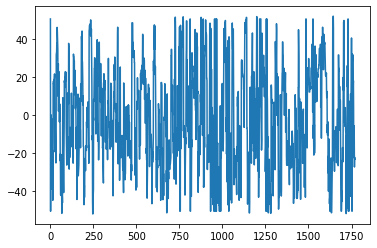

In [20]:
plt.plot(events['Start X'])

In [21]:
events[events['dist']>12].iloc[:10]

,Team,Type,From,To,Start X,Start Y,End X,End Y,Start Frame,Start Time [s],...,X_ZONE,XEND_ZONE,Y_ZONE,YEND_ZONE,Subtype,frameIdx,ball_x,ball_y,ball_z,dist
index,,,,,,,,,,,,,,,,,,,,,
0,Home,32,NaN,NaN,50.3500,34.000,NaN,NaN,0.0,0.00,...,"(0.0, 8.33)","(nan, nan)","(0.0, 12.5)","(nan, nan)",Start,0,-0.04,0.01,0.07,60.782170
1,Away,32,NaN,NaN,-50.3500,-34.000,NaN,NaN,0.0,0.00,...,"(0.0, 8.33)","(nan, nan)","(0.0, 12.5)","(nan, nan)",Start,0,-0.04,0.01,0.07,60.727063
65,Home,1,424622.0,NaN,-26.7862,16.116,-50.3500,-9.248,4208.0,168.32,...,"(75.0, 83.33)","(91.67, 100.0)","(25.0, 37.5)","(62.5, 75.0)",Pass,4208,-32.30,0.76,3.69,16.315904
92,Home,1,424622.0,95284.0,-6.5455,-16.184,-15.2057,-29.988,5913.0,236.52,...,"(50.0, 58.33)","(58.33, 66.67)","(62.5, 75.0)","(87.5, 100.0)",Pass,5913,-5.39,-32.00,0.13,15.858154
105,Away,1,479760.0,41556.0,5.8406,14.144,37.5611,-5.100,6437.0,257.48,...,"(50.0, 58.33)","(83.33, 91.67)","(62.5, 75.0)","(37.5, 50.0)",Pass,6437,10.16,-10.94,0.23,25.453178
139,Home,1,95284.0,455605.0,28.3974,-22.916,28.8002,-21.012,8863.0,354.52,...,"(16.67, 25.0)","(16.67, 25.0)","(75.0, 87.5)","(75.0, 87.5)",Pass,8863,16.83,-18.28,0.14,12.461831
144,Home,1,429039.0,156787.0,23.3624,-7.344,8.6602,4.964,9047.0,361.88,...,"(25.0, 33.33)","(33.33, 41.67)","(50.0, 62.5)","(37.5, 50.0)",Pass,9047,10.09,-3.54,0.09,13.806774
152,Home,8,110619.0,NaN,-6.3441,-12.036,NaN,NaN,9497.0,379.88,...,"(50.0, 58.33)","(nan, nan)","(62.5, 75.0)","(nan, nan)",Interception,9497,-6.67,-26.22,0.12,14.187744
175,Away,1,110618.0,245005.0,-17.1190,-5.100,11.7819,-26.724,11059.0,442.36,...,"(25.0, 33.33)","(58.33, 66.67)","(37.5, 50.0)","(0.0, 12.5)",Pass,11059,-5.12,-11.14,0.14,13.433451


In [22]:
bad_events=events[events['dist']>12]

<AxesSubplot:xlabel='dist', ylabel='Count'>

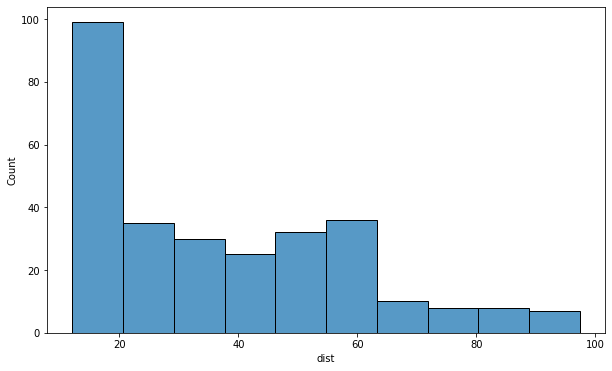

In [23]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.histplot(x='dist',data=bad_events)

## Build out dictionary with player id and jersey number

In [24]:
player_id_num=pd.read_csv(DATADIR+game_id+'/player_id_num.csv')

In [25]:
# initializing lists 
test_keys = list(player_id_num['playerId'])
test_values = list(player_id_num['jersey_num'])
# using zip() 
# to convert lists to dictionary 
player_dict = dict(zip(test_keys, test_values)) 

## Change events "From" from player ID to jersey number so it matches tracking data


In [26]:
def isNaN(num):
    '''cute lil guy that determines if an element is nan or not'''
    return num != num

In [27]:
#Creating Sybtype column

jersey_num=[]
for i in range(len( events)):
    if isNaN(events['From'].iloc[i]):
        jersey_num.append(np.nan)
    else:
        jersey_num.append(player_dict[events['From'].iloc[i]])

    

In [28]:
if len(jersey_num) == events.shape[0]:
    events['From']=jersey_num
else:
    'uh oh, you\'ve got a length mismatch between your list and the events dataframe'

In [29]:
jersey_num=[]
for i in range(len( events)):
    if isNaN(events['To'].iloc[i]):
        jersey_num.append(np.nan)
    else:
        jersey_num.append(player_dict[events['To'].iloc[i]])

    

In [30]:
if len(jersey_num) == events.shape[0]:
    events['To']=jersey_num
else:
    'uh oh, you\'ve got a length mismatch between your list and the events dataframe'

In [31]:
len(jersey_num)

1712

# Quantifying Pass probability

## Defining Home/Away Passes for analysis

In [57]:
# away passes
away_passes=events[(events['Subtype']=='Pass') & (events['Team']=="Away")]

In [58]:
away_passes.shape

(642, 53)

In [59]:
# home passes
home_passes=events[(events['Subtype']=='Pass') & (events['Team']=="Home")]

In [60]:
home_passes.shape

(416, 53)

## AWAY TEAM ASSESSMENT

In [68]:
# first get pitch control model parameters
params = mpc.default_model_params()

In [ ]:
calculate_pitch_control_at_target(target_position, attacking_players, defending_players, ball_start_pos, params,ball_speed):

In [72]:
params['average_ball_speed']

15.0

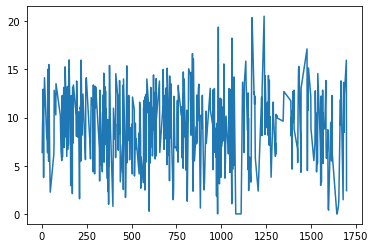

In [80]:
plt.plot(away_passes['ball_speed'])

Found issue with using ball speed as input- if it is set as 0, assume average ball speed 

In [85]:
away_passes['ball_speed'].median()

9.325

In [83]:
for i,row in away_passes.iterrows():
    if isNaN(row['ball_speed']):
        print("nan",i)
    elif row['ball_speed']==0:
        print("0",i)

0 979
0 1080
0 1087
0 1088
0 1089
0 1090
0 1091
0 1096
0 1109
0 1110
0 1643
0 1644
0 1645


In [88]:
away_pass_success_probability=[]

In [89]:
for i,row in away_passes.iterrows():
    ### This if statement checks if more than 90/107 rows are nan, if so, it skips
    if list(tracking_home[tracking_home.index==row['Start Frame']].isnull().sum(axis=1))[0]>90:
        away_pass_success_probability.append( (i,np.nan) )
    else:
        pass_start_pos = np.array([row['ball_x'],row['ball_y']])
        pass_target_pos = np.array([row['End X'],row['End Y']])
        pass_frame = row['Start Frame']
        # find goalkeepers for offside calculation and so player initialization works properly 
        #      - calculating them for each frame in case of substitutions
        GK_numbers = [mio.find_goalkeeper(tracking_home,int(row['Start Frame'])),
                      mio.find_goalkeeper(tracking_away,int(row['Start Frame']))]
        attacking_players = mpc.initialise_players(tracking_away.loc[pass_frame],'away',params, GK_numbers[1])
        defending_players = mpc.initialise_players(tracking_home.loc[pass_frame],'home',params, GK_numbers[0])
        if row['ball_speed']==0:
            ballspeed=away_passes['ball_speed'].median()
        else:    
            ballspeed=row['ball_speed']
            
        Patt,Pdef = mpc.calculate_pitch_control_at_target(pass_target_pos, attacking_players, defending_players, pass_start_pos, params,ball_speed=ballspeed)

        away_pass_success_probability.append( (i,Patt) )

In [90]:
len(away_pass_success_probability)

642

Text(0, 0.5, 'Frequency')

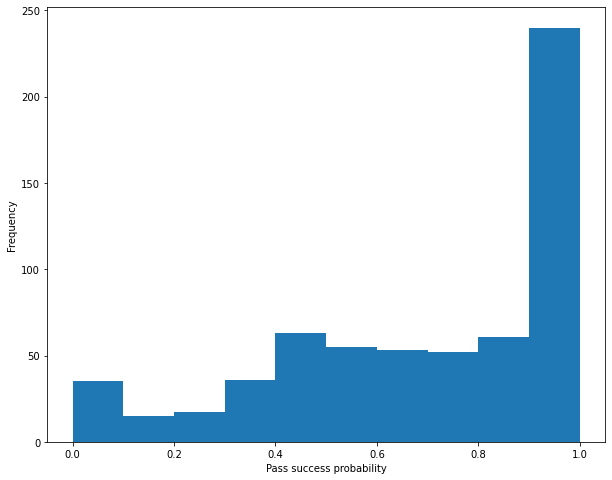

In [91]:
fig,ax = plt.subplots(figsize=(10,8))
ax.hist( [p[1] for p in away_pass_success_probability], np.arange(0,1.1,0.1))    
ax.set_xlabel('Pass success probability')
ax.set_ylabel('Frequency')  


## New Pass Success Probability calculation with the badly labelled events removed

### Industry Example

In [139]:
away_pass_success_probability=[]

In [140]:
for i,row in away_passes[away_passes['dist']<20].iterrows():
    ### This if statement checks if more than 90/107 rows are nan, if so, it skips
    if list(tracking_home[tracking_home.index==row['Start Frame']].isnull().sum(axis=1))[0]>90:
        away_pass_success_probability.append( (i,np.nan) )
    else:
        pass_start_pos = np.array([row['Start X'],row['Start Y']])
        pass_target_pos = np.array([row['End X'],row['End Y']])
        pass_frame = row['Start Frame']
        # find goalkeepers for offside calculation and so player initialization works properly 
        #      - calculating them for each frame in case of substitutions
        GK_numbers = [mio.find_goalkeeper(tracking_home,int(row['Start Frame'])),
                      mio.find_goalkeeper(tracking_away,int(row['Start Frame']))]
        attacking_players = mpc.initialise_players(tracking_away.loc[pass_frame],'away',params, GK_numbers[1])
        defending_players = mpc.initialise_players(tracking_home.loc[pass_frame],'home',params, GK_numbers[0])
        
        if row['ball_speed']==0:
            ballspeed=away_passes['ball_speed'].median()
        else:    
            ballspeed=row['ball_speed']
        Patt,Pdef = mpc.calculate_pitch_control_at_target(pass_target_pos, attacking_players, defending_players, pass_start_pos, params,ball_speed=ballspeed)

        away_pass_success_probability.append( (i,Patt) )

In [141]:
len(away_pass_success_probability)

586

Text(0.5, 1.0, 'Pass Success Probability Histogram')

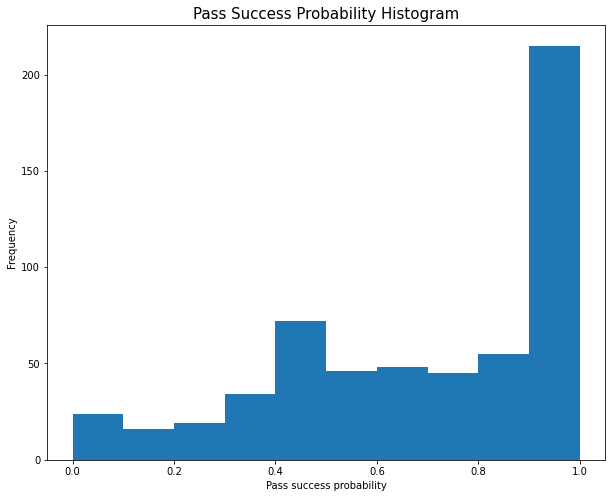

In [184]:
fig,ax = plt.subplots(figsize=(10,8))
ax.hist( [p[1] for p in away_pass_success_probability], np.arange(0,1.1,0.1))    
ax.set_xlabel('Pass success probability')
ax.set_ylabel('Frequency')  
ax.set_title('Pass Success Probability Histogram',fontsize=15)


# HOME TEAM ASSESSMENT

In [185]:
home_pass_success_probability=[]

In [186]:
for i,row in home_passes.iterrows():
    ### This if statement checks if more than 90/107 rows are nan, if so, it skips
    if list(tracking_home[tracking_home.index==row['Start Frame']].isnull().sum(axis=1))[0]>90:
        home_pass_success_probability.append( (i,np.nan) )
    else:
        pass_start_pos = np.array([row['Start X'],row['Start Y']])
        pass_target_pos = np.array([row['End X'],row['End Y']])
        pass_frame = row['Start Frame']
        # find goalkeepers for offside calculation and so player initialization works properly 
        #      - calculating them for each frame in case of substitutions
        GK_numbers = [mio.find_goalkeeper(tracking_home,int(row['Start Frame'])),
                      mio.find_goalkeeper(tracking_away,int(row['Start Frame']))]
        attacking_players = mpc.initialise_players(tracking_away.loc[pass_frame],'away',params, GK_numbers[1])
        defending_players = mpc.initialise_players(tracking_home.loc[pass_frame],'home',params, GK_numbers[0])
        if row['ball_speed']==0:
            ballspeed=home_passes['ball_speed'].median()
        else:    
            ballspeed=row['ball_speed']
        Patt,Pdef = mpc.calculate_pitch_control_at_target(pass_target_pos, attacking_players, defending_players, pass_start_pos, params,ball_speed=ballspeed)

        home_pass_success_probability.append( (i,Patt) )

In [187]:
len(home_pass_success_probability)

416

Text(0, 0.5, 'Frequency')

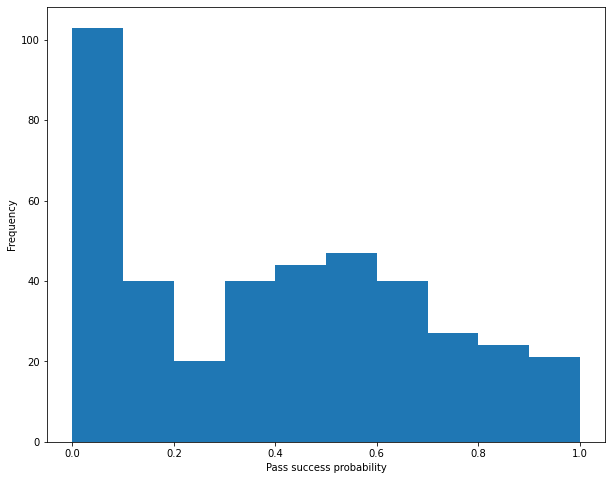

In [188]:
fig,ax = plt.subplots(figsize=(10,8))
ax.hist( [p[1] for p in home_pass_success_probability], np.arange(0,1.1,0.1))    
ax.set_xlabel('Pass success probability')
ax.set_ylabel('Frequency')  


## New Pass Success Probability calculation with the badly labelled events removed

In [143]:
home_pass_success_probability=[]

In [144]:
for i,row in home_passes[home_passes['dist']<20].iterrows():
    ### This if statement checks if more than 90/107 rows are nan, if so, it skips
    if list(tracking_home[tracking_home.index==row['Start Frame']].isnull().sum(axis=1))[0]>90:
        home_pass_success_probability.append( (i,np.nan) )
    else:
        pass_start_pos = np.array([row['Start X'],row['Start Y']])
        pass_target_pos = np.array([row['End X'],row['End Y']])
        pass_frame = row['Start Frame']
        # find goalkeepers for offside calculation and so player initialization works properly 
        #      - calculating them for each frame in case of substitutions
        GK_numbers = [mio.find_goalkeeper(tracking_home,int(row['Start Frame'])),
                      mio.find_goalkeeper(tracking_away,int(row['Start Frame']))]
        attacking_players = mpc.initialise_players(tracking_away.loc[pass_frame],'away',params, GK_numbers[1])
        defending_players = mpc.initialise_players(tracking_home.loc[pass_frame],'home',params, GK_numbers[0])
        if row['ball_speed']==0:
            ballspeed=home_passes['ball_speed'].median()
        else:    
            ballspeed=row['ball_speed']
        Patt,Pdef = mpc.calculate_pitch_control_at_target(pass_target_pos, attacking_players, defending_players, pass_start_pos, params, ball_speed=ballspeed)

        home_pass_success_probability.append( (i,Patt) )

In [145]:
len(home_pass_success_probability)

381

Text(0, 0.5, 'Frequency')

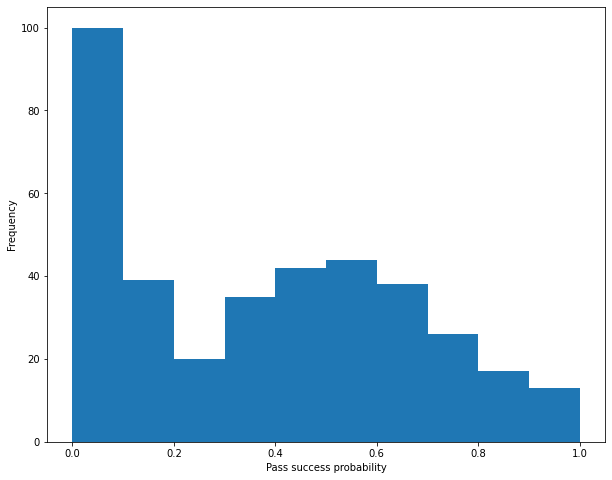

In [146]:
fig,ax = plt.subplots(figsize=(10,8))
ax.hist( [p[1] for p in home_pass_success_probability], np.arange(0,1.1,0.1))    
ax.set_xlabel('Pass success probability')
ax.set_ylabel('Frequency')  


## Could try another tactic by measuring distance between "From" player to ball
Tried this, but it only helps with identifying mislabelled events, not with the accuracy - ball position is used for that

## I'll have to merge events and tracking together to get this info

In [148]:
tracking_all=tracking_home.reset_index().merge(tracking_away.reset_index().drop(['Time [s]','Period','ball_x',
                                                                                 'ball_y','ball_z','ball_speed'],axis=1),how='left',on='frameIdx')

In [149]:
columns_home_velocity=[c for c in tracking_home.keys() if ((c[-3:]=='_vx') or (c[-6:]=='_speed') ) and ((c[0:4]=="home") and ((c[0:4]!="ball")))]

In [150]:
columns_away_velocity=[c for c in tracking_away.keys() if ((c[-3:]=='_vx' ) or (c[-6:]=='_speed')) and ((c[0:4]!="home") and (c[0:4]!="ball"))]

In [151]:
columns_all=columns_home_velocity+columns_away_velocity

In [152]:
tracking_all.drop(columns_all,axis=1)

,frameIdx,home_2_x,home_2_y,home_2_z,home_4_x,home_4_y,home_4_z,home_5_x,home_5_y,home_5_z,...,away_3_vy,away_31_vy,away_32_vy,away_35_vy,away_53_vy,away_56_vy,away_6_vy,away_7_vy,away_87_vy,away_9_vy
0,0,NaN,NaN,NaN,18.47,-2.79,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,18.47,-2.80,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,18.47,-2.82,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,18.45,-2.84,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NaN,NaN,NaN,18.43,-2.87,0.0,NaN,NaN,NaN,...,0.285714,NaN,0.0,NaN,NaN,NaN,-0.357143,NaN,0.142857,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139057,139057,-11.08,5.93,0.0,NaN,NaN,NaN,-20.76,5.18,0.0,...,NaN,0.0,NaN,0.250000,0.571429,0.964286,NaN,0.500000,NaN,0.0
139058,139058,-11.02,5.92,0.0,NaN,NaN,NaN,-20.78,5.15,0.0,...,NaN,0.0,NaN,0.142857,0.571429,0.964286,NaN,0.464286,NaN,0.0
139059,139059,-10.98,5.92,0.0,NaN,NaN,NaN,-20.81,5.11,0.0,...,NaN,0.0,NaN,-0.008929,0.589286,0.955357,NaN,0.410714,NaN,0.0
139060,139060,-10.95,5.92,0.0,NaN,NaN,NaN,-20.84,5.07,0.0,...,NaN,0.0,NaN,-0.160714,0.607143,0.946429,NaN,0.357143,NaN,0.0


In [153]:
new_events=events.drop(['ball_x','ball_y','ball_z'],axis=1).merge(tracking_all.reset_index().drop(columns_all,axis=1),how='left',on='frameIdx')

## Measure distance between from and ball


In [154]:
dist_btw=[]
for i,row in new_events.iterrows():
    if isNaN(row['From']):
        dist_btw.append(100)
    #elif isNaN():    
    else:
        tempx=row['Team'].lower() + '_' +str(int(row['From']))+ '_x'
        tempy=row['Team'].lower() + '_' +str(int(row['From']))+ '_y'
        dist_x=(row[tempx]-row['ball_x'])**2
        dist_y=(row[tempy]-row['ball_y'])**2
        #print(np.sqrt(dist_x+dist_y))
        dist_btw.append(np.sqrt(dist_x+dist_y))

In [155]:
len(dist_btw)

1712

In [156]:
new_events['dist_btw']=dist_btw

In [157]:
len(new_events[new_events['dist_btw']>40])

138

In [158]:
new_events[new_events['dist_btw']>40].sort_values(by='dist_btw')

,Team,Type,From,To,Start X,Start Y,End X,End Y,Start Frame,Start Time [s],...,away_31_vy,away_32_vy,away_35_vy,away_53_vy,away_56_vy,away_6_vy,away_7_vy,away_87_vy,away_9_vy,dist_btw
549,Away,5,15.0,NaN,-0.3021,34.952,NaN,NaN,36327.0,1453.08,...,NaN,0.714286,NaN,NaN,NaN,0.285714,NaN,0.500000,NaN,40.046076
993,Away,1,9.0,15.0,-31.1163,19.584,-26.6855,31.28,74805.0,2992.20,...,5.392857,NaN,4.000000,NaN,3.178571,NaN,0.178571,NaN,1.214286,40.055851
1660,Away,5,1.0,NaN,-51.5584,25.364,NaN,NaN,133332.0,5333.28,...,0.535714,NaN,0.250000,0.035714,0.392857,NaN,-0.821429,NaN,0.928571,40.074763
380,Home,5,4.0,NaN,-25.4771,34.884,NaN,NaN,25983.0,1039.32,...,NaN,2.500000,NaN,NaN,NaN,0.035714,NaN,1.464286,NaN,40.143926
1343,Away,49,12.0,NaN,-31.2170,23.188,NaN,NaN,111165.0,4446.60,...,2.250000,NaN,1.821429,2.750000,0.750000,NaN,0.464286,NaN,1.285714,40.395902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211,Home,40,NaN,NaN,50.3500,34.000,NaN,NaN,95116.0,3804.64,...,-0.035714,NaN,0.214286,0.000000,-0.142857,NaN,-0.535714,NaN,-0.071429,100.000000
1214,Home,68,NaN,NaN,50.3500,34.000,NaN,NaN,94919.0,3796.76,...,-0.285714,NaN,-0.714286,NaN,0.285714,NaN,-0.142857,NaN,-0.785714,100.000000
1476,Home,40,NaN,NaN,50.3500,34.000,NaN,NaN,119334.0,4773.36,...,1.714286,NaN,1.000000,0.821429,0.535714,NaN,1.000000,NaN,0.321429,100.000000
727,Away,28,NaN,NaN,-50.3500,-34.000,NaN,NaN,52512.0,2100.48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000


##### 

# Try out ways of flagging bad events

In [159]:
test_events=copy.deepcopy(new_events)

In [160]:
test_events=test_events[list(new_events.drop(['dist'],axis=1).columns)+['dist']]

### First one is to filter the events when the distance between ball and start location (in event) is greater than 7 AND the distance between the ball carrier and the ball is greater than 15 m

In [161]:
test_events[(test_events['dist']>7)&(test_events['dist_btw']>15)]

,Team,Type,From,To,Start X,Start Y,End X,End Y,Start Frame,Start Time [s],...,away_32_vy,away_35_vy,away_53_vy,away_56_vy,away_6_vy,away_7_vy,away_87_vy,away_9_vy,dist_btw,dist
0,Home,32,NaN,NaN,50.3500,34.000,NaN,NaN,0.0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,60.782170
1,Away,32,NaN,NaN,-50.3500,-34.000,NaN,NaN,0.0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,60.727063
16,Away,44,3.0,NaN,16.5148,-5.372,NaN,NaN,1454.0,58.16,...,-0.750000,NaN,NaN,NaN,0.750000,NaN,0.321429,NaN,25.018925,11.159377
85,Home,1,6.0,40.0,21.6505,-1.700,22.7582,7.616,5578.0,223.12,...,-3.000000,NaN,NaN,NaN,-1.928571,NaN,-2.964286,NaN,22.876210,7.280958
86,Home,1,40.0,29.0,22.7582,7.616,17.7232,11.288,5629.0,225.16,...,0.535714,NaN,NaN,NaN,0.571429,NaN,1.892857,NaN,19.920916,7.177574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1689,Home,49,27.0,NaN,10.9763,26.180,NaN,NaN,137164.0,5486.56,...,NaN,0.750000,-1.392857,2.392857,NaN,6.178571,NaN,0.000000,21.011016,7.095865
1691,Home,1,12.0,14.0,19.5358,11.084,40.3807,2.720,137263.0,5490.52,...,NaN,0.678571,-2.714286,0.607143,NaN,-5.892857,NaN,-0.107143,24.513906,8.525363
1695,Away,70,NaN,NaN,-50.3500,-34.000,NaN,NaN,137429.0,5497.16,...,NaN,1.142857,2.035714,1.000000,NaN,2.428571,NaN,0.071429,100.000000,86.221519
1701,Home,1,12.0,25.0,29.3037,29.580,15.5078,9.044,138093.0,5523.72,...,NaN,-0.785714,-0.357143,0.357143,NaN,-0.178571,NaN,-0.071429,58.826719,10.587011


### Second one is to label "Good" events where the players aren't labelled properly
filter the events when the distance between ball and start location (in event) is LESS than 7 AND the distance between the ball carrier and the ball is GREATER than 20 m

In [162]:
test_events[(test_events['dist']<7)&(test_events['dist_btw']>20)]

,Team,Type,From,To,Start X,Start Y,End X,End Y,Start Frame,Start Time [s],...,away_32_vy,away_35_vy,away_53_vy,away_56_vy,away_6_vy,away_7_vy,away_87_vy,away_9_vy,dist_btw,dist
2,Away,1,3.0,13.0,0.2014,0.000,-15.8099,-0.272,9.0,0.36,...,-0.214286,NaN,NaN,NaN,-0.678571,NaN,0.035714,NaN,22.565888,0.735762
34,Home,8,40.0,NaN,31.4184,-32.232,NaN,NaN,2461.0,98.44,...,-1.000000,NaN,NaN,NaN,0.500000,NaN,0.714286,NaN,36.647784,3.055911
35,Home,5,40.0,NaN,32.4254,-34.816,NaN,NaN,2471.0,98.84,...,-0.107143,NaN,NaN,NaN,0.750000,NaN,0.107143,NaN,38.289612,3.916035
36,Away,5,20.0,NaN,32.4254,-34.816,NaN,NaN,2471.0,98.84,...,-0.107143,NaN,NaN,NaN,0.750000,NaN,0.107143,NaN,55.971187,3.916035
38,Away,1,20.0,28.0,28.9009,-29.648,45.9192,-30.804,2791.0,111.64,...,0.214286,NaN,NaN,NaN,-0.392857,NaN,-0.357143,NaN,32.450931,3.680772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1702,Home,1,25.0,16.0,15.5078,9.044,19.7372,-3.468,138184.0,5527.36,...,NaN,-2.750000,-1.642857,-1.500000,NaN,-1.250000,NaN,-0.035714,23.444225,4.501727
1703,Home,1,16.0,6.0,18.0253,-6.324,4.4308,-30.260,138264.0,5530.56,...,NaN,-4.071429,-2.464286,-3.642857,NaN,-2.000000,NaN,0.000000,22.826566,1.547168
1705,Home,1,17.0,18.0,-22.2547,-29.172,-13.4938,-20.264,138424.0,5536.96,...,NaN,-1.071429,-1.107143,1.357143,NaN,-1.285714,NaN,0.178571,36.334204,4.507094
1707,Home,1,16.0,12.0,-5.5385,-15.504,-4.5315,6.188,138522.0,5540.88,...,NaN,2.571429,1.285714,2.178571,NaN,1.321429,NaN,-0.178571,30.446156,5.350553


In [163]:
print('There are {} Events in the "Good" event, but wrongly labelled with player category'.format(len(test_events[(test_events['dist']<7)&(test_events['dist_btw']>20)])))

There are 310 Events in the "Good" event, but wrongly labelled with player category


In [164]:
print('There are {} Events in the "Bad" event category'.format(len(test_events[(test_events['dist']>7)&(test_events['dist_btw']>15)])))

There are 238 Events in the "Bad" event category


In [166]:
test_events.columns

Index(['Team', 'Type', 'From', 'To', 'Start X', 'Start Y', 'End X', 'End Y',
       'Start Frame', 'Start Time [s]',
       ...
       'away_32_vy', 'away_35_vy', 'away_53_vy', 'away_56_vy', 'away_6_vy',
       'away_7_vy', 'away_87_vy', 'away_9_vy', 'dist_btw', 'dist'],
      dtype='object', length=210)

### Build column with vector direction and magnitude from start/end in events file so I can add it to the start of ball position and shift things




In [167]:
new_vec_x=[]
new_vec_y=[]
for i in range(len(events)):
    new_vec_x.append((events['End X'].iloc[i]-events['Start X'].iloc[i]) + events['ball_x'].iloc[i])
    new_vec_y.append((events['End Y'].iloc[i]-events['Start Y'].iloc[i]) + events['ball_y'].iloc[i])
    


In [168]:
test_events['new_event_end_x']=new_vec_x
test_events['new_event_end_y']=new_vec_y

In [169]:
test_events

,Team,Type,From,To,Start X,Start Y,End X,End Y,Start Frame,Start Time [s],...,away_53_vy,away_56_vy,away_6_vy,away_7_vy,away_87_vy,away_9_vy,dist_btw,dist,new_event_end_x,new_event_end_y
0,Home,32,NaN,NaN,50.3500,34.000,NaN,NaN,0.0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,60.782170,NaN,NaN
1,Away,32,NaN,NaN,-50.3500,-34.000,NaN,NaN,0.0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,60.727063,NaN,NaN
2,Away,1,3.0,13.0,0.2014,0.000,-15.8099,-0.272,9.0,0.36,...,NaN,NaN,-0.678571,NaN,0.035714,NaN,22.565888,0.735762,-16.5413,-0.192
3,Away,1,13.0,35.0,-15.8099,-0.272,-16.4141,-9.656,57.0,2.28,...,NaN,NaN,-2.142857,NaN,-1.071429,NaN,NaN,5.416690,-11.0642,-10.504
4,Away,1,35.0,9.0,-16.4141,-9.656,-30.3107,-10.744,89.0,3.56,...,NaN,NaN,-1.178571,NaN,-2.464286,NaN,NaN,2.842995,-27.9566,-12.338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1707,Home,1,16.0,12.0,-5.5385,-15.504,-4.5315,6.188,138522.0,5540.88,...,1.285714,2.178571,NaN,1.321429,NaN,-0.178571,30.446156,5.350553,-3.5730,11.452
1708,Home,1,12.0,6.0,-12.7889,7.344,-28.8002,-28.968,138659.0,5546.36,...,-0.642857,0.535714,NaN,-1.357143,NaN,0.035714,25.201766,3.929808,-27.8613,-25.152
1709,Home,1,6.0,16.0,-27.1890,-27.540,-22.0533,-19.992,138770.0,5550.80,...,-2.571429,0.142857,NaN,-1.464286,NaN,0.035714,NaN,5.045452,-20.2443,-15.282
1710,Home,1,16.0,25.0,-22.0533,-19.992,-22.2547,-8.976,138826.0,5553.04,...,1.107143,2.071429,NaN,-0.035714,NaN,0.000000,12.075570,9.477996,-17.0514,-1.054


## Test out this now method to plot events using the ball position and the original vector magnitude and direction

In [170]:
def plot_events_new( events, figax=None, field_dimen = (107,68.6), indicators = ['Marker','Arrow'], color='r', marker_style = 'o', alpha = 0.5, annotate=False):
    """ plot_events( events )
    
    Plots Metrica event positions on a football pitch. event data can be a single or several rows of a data frame. All distances should be in meters.
    
    Parameters
    -----------
        events: row (i.e. instant) of the home team tracking data frame
        fig,ax: Can be used to pass in the (fig,ax) objects of a previously generated pitch. Set to (fig,ax) to use an existing figure, or None (the default) to generate a new pitch plot, 
        field_dimen: tuple containing the length and width of the pitch in meters. Default is (106,68)
        indicators: List containing choices on how to plot the event. 'Marker' places a marker at the 'Start X/Y' location of the event; 'Arrow' draws an arrow from the start to end locations. Can choose one or both.
        color: color of indicator. Default is 'r' (red)
        marker_style: Marker type used to indicate the event position. Default is 'o' (filled ircle).
        alpha: alpha of event marker. Default is 0.5    
        annotate: Boolean determining whether text annotation from event data 'Subtype' and 'From' fields is shown on plot. Default is False.
        
    Returrns
    -----------
       fig,ax : figure and aixs objects (so that other data can be plotted onto the pitch)

    """

    if figax is None: # create new pitch 
        fig,ax = plot_pitch( field_dimen = field_dimen )
    else: # overlay on a previously generated pitch
        fig,ax = figax 
    for i,row in events.iterrows():
        if 'Marker' in indicators:
            ax.plot(  row['ball_x'], row['ball_y'], color+marker_style, alpha=alpha )
        if 'Arrow' in indicators:
            ax.annotate("", xy=row[['new_event_end_x','new_event_end_y']], xytext=row[['ball_x','ball_y']], alpha=alpha, arrowprops=dict(alpha=alpha,width=0.5,headlength=4.0,headwidth=4.0,color=color),annotation_clip=False)
        if annotate:
            #textstring = str(row['Subtype']) + ': ' + str(row['From']) #- if I have a subtype column
            textstring = str(row['From']) 
            ax.text( row['ball_x'], row['ball_y'], textstring, fontsize=10, color=color)
    return fig,ax

## Doesn't look like 7 is large enough to filter out bad events that were mislabeled
Looks like 20 is the number that is right filter here

(17 worked when I was also filtering for distance of ball position to player tagged)


This code will work - run it to see what I mean:

`for i,row in test_events[(test_events['dist']>17)&(test_events['dist_btw']>15)].iterrows():
    if isNaN(row['End X']):
        print('----')
    else:
        event_frame=row['Start Frame']
        fig,ax=mviz.plot_frame(tracking_home.loc[event_frame], tracking_away.loc[event_frame],include_player_velocities=True, annotate=True)# plot the 3 events leading up to the second goal
        plot_events_new(pd.DataFrame(row).T.loc[i:i], color='y', alpha=1.0,indicators = ['Marker','Arrow'], annotate=True,figax = (fig,ax))
        ## need this line for dataset with no "receiver ID/To"
        ax.set_title("Team {}, From: {} To: {} ".format(row['Team'],row['From'],row['To']))
        ##
       ax.set_xlabel("Ball loc_tracking: {},{}, Ball loc_events: {},{}".format(tracking_home['ball_x'].loc[event_frame],
                                                                                tracking_home['ball_y'].loc[event_frame],
                                                                                round(row['Start X'],2), round(row['Start Y'],2)),fontsize=12)`

`

# Sorted Events into 3 Categories:
1. **`bad_events`** - events that are just wrongly labelled
2. **`good_event_wrongly_labelled`** - events that are labelled with the players incorrectly but are correct
3. **`good_events`** - events that are labelled correctly and are accurate

In [171]:
bad_events=test_events[test_events.index.isin(list(test_events[(test_events['dist']>20)].index))]

In [172]:
bad_events.shape

(195, 212)

In [173]:
print("By Applying this filter you get rid of {}, wrongly labelled events".format(len(test_events[(test_events['dist']>20)])))

By Applying this filter you get rid of 195, wrongly labelled events


In [174]:
events=test_events[~test_events.index.isin(list(test_events[(test_events['dist']>20)].index))]

In [175]:
events.shape

(1517, 212)

In [176]:
good_events=test_events[test_events.index.isin(list(test_events[(test_events['dist']<20)&(test_events['dist_btw']<15)].index))]

In [177]:
print("The filter finds that {}, are correctly labelled and accurate".format(len(good_events)))

The filter finds that 272, are correctly labelled and accurate


In [178]:
good_event_wrongly_labelled=events[~events.index.isin(list(events[(events['dist']<20)&(events['dist_btw']<15)].index))]

In [179]:
print("The filter finds that {}, are incorrectly labelled but accurate".format(len(good_event_wrongly_labelled)))

The filter finds that 1245, are incorrectly labelled but accurate


### Export bad, good, and wrongly labelled events

In [180]:
bad_events.to_csv(DATADIR+game_id+'/bad_events_merged.csv')

In [181]:
good_events.to_csv(DATADIR+game_id+'/good_events.csv')

In [182]:
good_event_wrongly_labelled.to_csv(DATADIR+game_id+'/good_events_wrong_label.csv')